In [ ]:
# 📘 Student Performance Predictor for EduQuest Coaching
print('Hello from YBI Foundation 🚀')

In [29]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [42]:
from google.colab import files
uploaded = files.upload()

# Step 2: Load data
data = pd.read_csv('Student Performance Predictor for EduQuest Coaching.csv')
df = pd.read_csv(next(iter(uploaded)))
print("First 5 rows:")
display(df.head())



Saving Student Performance Predictor for EduQuest Coaching.csv to Student Performance Predictor for EduQuest Coaching (6).csv
First 5 rows:


,gender,age,parental_education,family_income,internet_access,previous_exam_score,attendance_rate,homework_completion_rate,class_participation_score,number_of_absences,extra_curricular_involvement,learning_hours_per_week,tutor_support,final_exam_score
0,Male,14,Diploma,29591.84,Yes,93.25,91.01,76.56,9.52,1,Moderate,12.08,No,100.00
1,Male,16,Diploma,35222.46,Yes,85.06,83.85,64.82,3.42,2,Moderate,11.81,Yes,80.81
2,Male,14,Diploma,29730.93,Yes,79.93,86.71,75.02,3.75,1,Low,11.08,Yes,77.96
3,Female,15,Diploma,29074.09,Yes,98.94,88.04,55.50,6.95,0,Moderate,6.65,Yes,98.86
4,Male,19,Graduate,42305.33,Yes,64.54,61.22,98.85,6.03,5,Moderate,9.26,No,64.64


In [43]:
# Perform EDA.
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("✅ No missing values in the dataset.")
else:
    print("⚠️ Missing values detected:")
    print(missing_values)


⚠️ Missing values detected:
extra_curricular_involvement    372
dtype: int64


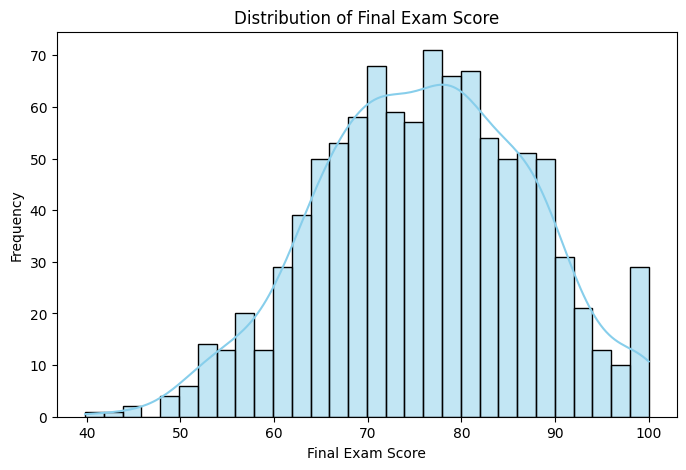

In [34]:
#distribution of final scores

plt.figure(figsize=(8, 5))
sns.histplot(df['final_exam_score'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Final Exam Score")
plt.xlabel("Final Exam Score")
plt.ylabel("Frequency")
plt.show()

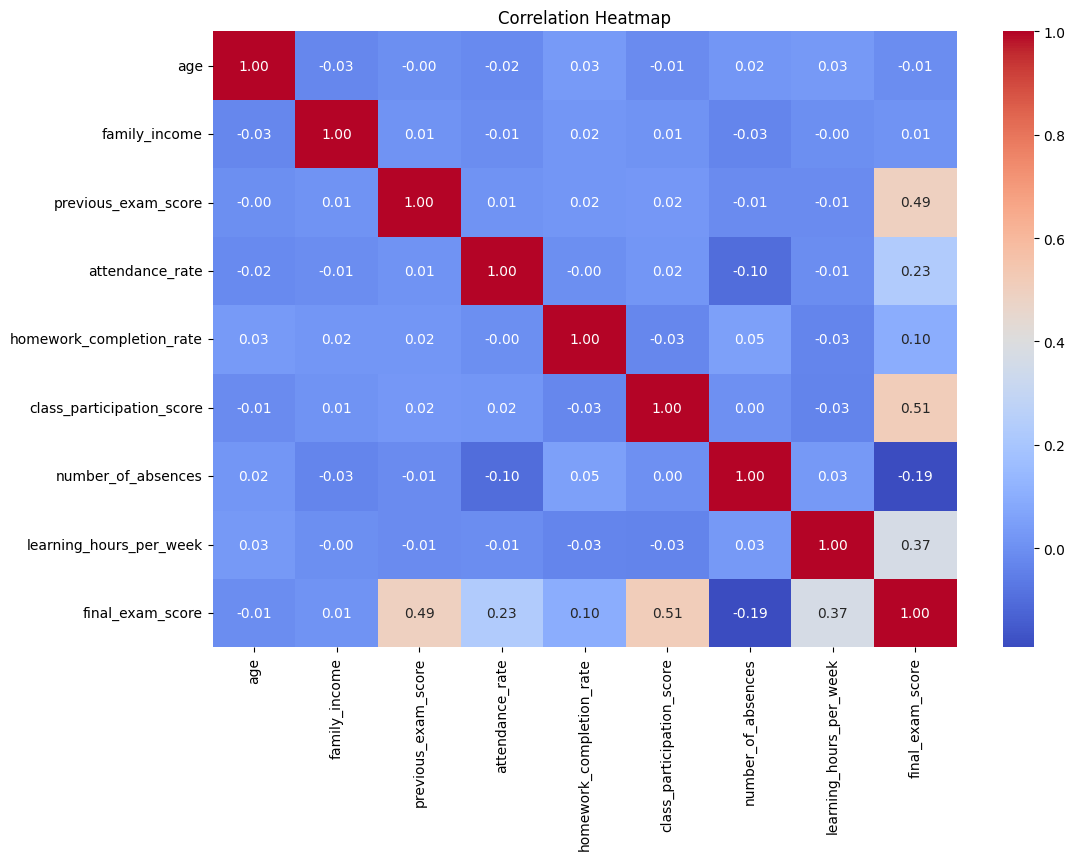

In [35]:
# Heatmap
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [44]:
# Removing Duplicates
print(f"Original dataset shape: {df.shape}")
df = df.drop_duplicates()
df = df.dropna()
print(f"Shape after removing duplicates and missing values: {df.shape}")


Original dataset shape: (1000, 14)
Shape after removing duplicates and missing values: (628, 14)


In [38]:
# Select Features
X = df.drop(columns=['final_exam_score'])
y = df['final_exam_score']

# Apply OHE and split the data set
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# define the models.

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Step 9: Evaluate the best model and show output
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        'Model': name,
        'R² Score': round(r2, 3),
        'RMSE': round(rmse, 2)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by='R² Score', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
display(results_df)

,Model,R² Score,RMSE
0,Linear Regression,0.791,5.14
1,Ridge Regression,0.791,5.14
2,Random Forest,0.618,6.96
3,Decision Tree,0.153,10.36


In [40]:
# Use the best model to predict the scores.

best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

comparison_df = pd.DataFrame({
    'Actual Score': y_test.values,
    'Predicted Score': y_pred
})
comparison_df.head(10)


,Actual Score,Predicted Score
0,87.72,86.411712
1,61.11,68.153749
2,87.22,82.919527
3,84.75,75.308046
4,80.91,72.125701
5,65.47,70.830965
6,60.41,56.448674
7,80.79,78.118765
8,49.53,56.833851
9,79.77,77.000143


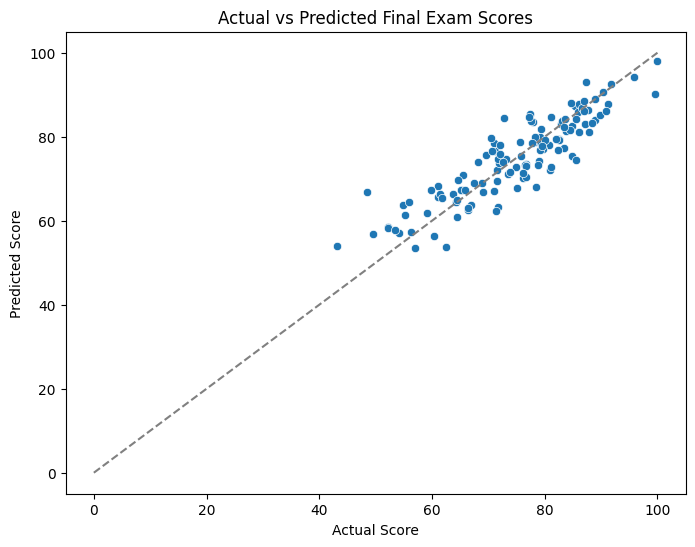

In [41]:
# Actual vs Predicted comparison
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual Score', y='Predicted Score', data=comparison_df)
plt.plot([0, 100], [0, 100], '--', color='gray')  # Ideal line
plt.title("Actual vs Predicted Final Exam Scores")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.show()
